# Transfer Learning

There are variety of methodologies for transfer learning such as **fine tuning** and **frozen feature extraction**. In this tutorial, we will demonstrate how to do a **frozen feature extraction** transfer learning by using XenonPy.

This tutorial will use **Refractive Index** data which collected from [Polymer Genome](https://www.polymergenome.org). Due to permissions of Polymer Genome, we can't provide these data together with this tutorial. If you wan to rerun this notbook locally, you must collect these data yourself.

### useful functions

In [1]:
%run tools.ipynb

### frozen feature extraction

Do A frozen feature extraction transfer learing can be splitted into 2 steps.

1. you need per-trained model(s) as source. This can be done by accessing **XenonPy.MDL**. If you don't know how to do it, see https://github.com/yoshida-lab/XenonPy/blob/master/samples/mdl.ipynb.

2. you need a feature extractor to generate new descriptors from the source model(s).
At here, we would like to intrduce you to our feature extractor, ``xenonpy.descriptor.FrozenFeaturizer``.

The following codes show a transfer learning from **Refractive Index** to **Refractive Index** but use different domian. The source models will are trained on the inorganic compounds data and the target is the same property in polymer.

Let's do this transfer learning step-by-setp.

#### 1. query **Refractive Index** models 

In [2]:
from xenonpy.datatools import MDL

mdl = MDL()
summary = mdl("Stable inorganic compounds", property_has="refractive", save_to=False)
summary = summary.sort_values('mae')
summary.head(5)

,descriptor,lang,mae,method,modelSet,property,r,regress,succeed,transferred,url
mId,,,,,,,,,,,
M28279,xenonpy.composition,python,0.227588,pytorch.nn.neural_network,Stable inorganic compounds in materials projec...,inorganic.crystal.refractive_index,0.720082,True,True,False,http://xenon.ism.ac.jp/mdl/S1/inorganic.crysta...
M29866,xenonpy.composition,python,0.233900,pytorch.nn.neural_network,Stable inorganic compounds in materials projec...,inorganic.crystal.refractive_index,0.735080,True,True,False,http://xenon.ism.ac.jp/mdl/S1/inorganic.crysta...
M28158,xenonpy.composition,python,0.234696,pytorch.nn.neural_network,Stable inorganic compounds in materials projec...,inorganic.crystal.refractive_index,0.728820,True,True,False,http://xenon.ism.ac.jp/mdl/S1/inorganic.crysta...
M27072,xenonpy.composition,python,0.235224,pytorch.nn.neural_network,Stable inorganic compounds in materials projec...,inorganic.crystal.refractive_index,0.754349,True,True,False,http://xenon.ism.ac.jp/mdl/S1/inorganic.crysta...
M28559,xenonpy.composition,python,0.235340,pytorch.nn.neural_network,Stable inorganic compounds in materials projec...,inorganic.crystal.refractive_index,0.749597,True,True,False,http://xenon.ism.ac.jp/mdl/S1/inorganic.crysta...


#### 2. download the best performance model based on MAE

In [3]:
summary = summary.sort_values('mae')
urls = summary['url'][0]
urls

'http://xenon.ism.ac.jp/mdl/S1/inorganic.crystal.refractive_index/xenonpy.composition/pytorch.nn.neural_network/4i6g-290-284-189-98-73-48-29@1.tar.gz'

In [4]:
results = mdl.pull([urls])
results

100%|██████████| 1/1 [00:20<00:00, 20.39s/it]


['/Users/liuchang/projects/XenonPy/samples/S1/inorganic.crystal.refractive_index/xenonpy.composition/pytorch.nn.neural_network/4i6g-290-284-189-98-73-48-29@1']

#### 3. load **Refractive Index** data from Polymer Genome and calculate the ``Composition`` descriptors

In [5]:
pg = <load your polyer genome data>

It shoud be organized as below.

In [20]:
pg.head(3)
pg.info()

,Smiles,Natoms,Ntypes,Volume of Cell($\AA^3$),"Band Gap, PBE(eV)","Band Gap, HSE06(eV)",Dielectric Constant,"Dielectric Constant, Electronic","Dielectric Constant, Ionic",Atomization Energy(eV/atom),Density(g/cm$^3$),Refractive Index,Ionization Energy(eV),Electron Affinity(eV),Cohesive Energy(eV/atom),composition,Formula
ID_name,,,,,,,,,,,,,,,,,
MOL1,[C@H]([CH]O)(O[C@H]1[C@H](CO)O[C@@H]([CH][C@@H...,84,3,572.42,5.62,7.48,3.78,2.85,0.93,-5.48,1.88,1.69,6.87,0.83,-0.63,"{'O': 20.0, 'H': 40.0, 'C': 24.0}",H40C24O20
MOL2,[CH][C@H](C[C@@H](C[C@H](C[CH][C]=[CH])C(=[CH]...,128,2,1258.30,3.94,4.83,2.72,2.64,0.08,-5.90,1.10,1.62,3.56,1.56,-0.63,"{'C': 64.0, 'H': 64.0}",H64C64
MOL3,C[C@H](C[CH][CH][CH]C)[CH2].C[C@@H](C[CH][CH][...,108,2,762.10,6.32,7.70,2.61,2.59,0.02,-5.14,1.10,1.61,6.19,0.43,-0.51,"{'C': 36.0, 'H': 72.0}",H72C36


<class 'pandas.core.frame.DataFrame'>
Index: 1069 entries, MOL1 to MOL1069
Data columns (total 17 columns):
Smiles                             1069 non-null object
Natoms                             1069 non-null int64
Ntypes                             1069 non-null int64
Volume of Cell($\AA^3$)            1069 non-null float64
Band Gap, PBE(eV)                  1069 non-null float64
Band Gap, HSE06(eV)                1069 non-null float64
Dielectric Constant                1069 non-null float64
Dielectric Constant, Electronic    1069 non-null float64
Dielectric Constant, Ionic         1069 non-null float64
Atomization Energy(eV/atom)        1069 non-null float64
Density(g/cm$^3$)                  344 non-null float64
Refractive Index                   1069 non-null float64
Ionization Energy(eV)              330 non-null float64
Electron Affinity(eV)              330 non-null float64
Cohesive Energy(eV/atom)           344 non-null float64
composition                        1069 non-nu

In [6]:
from xenonpy.descriptor import Compositions

pg_desc = Compositions().transform(pg['composition'])
pg_desc.head(3)

,ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,ave:covalent_radius_pyykko,...,min:num_s_valence,min:period,min:specific_heat,min:thermal_conductivity,min:vdw_radius,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability
ID_name,,,,,,,,,,,,,,,,,,,,,
MOL1,4.095238,98.42891,168.333333,11.561905,7.721000,1488.27381,54.596505,20.761905,51.333333,51.666667,...,1.0,1.0,0.711,0.02658,110.0,120.0,162.0,288.6,317.5,0.666793
MOL2,3.500000,85.00000,172.000000,9.700000,6.509500,2560.14000,44.899820,27.205000,52.000000,53.500000,...,1.0,1.0,0.711,0.18050,110.0,120.0,162.0,288.6,1270.0,0.666793
MOL3,2.666667,83.00000,166.000000,11.166667,4.675667,1713.52000,48.866426,20.306667,45.000000,46.333333,...,1.0,1.0,0.711,0.18050,110.0,120.0,162.0,288.6,1270.0,0.666793


#### 4. predict Polymer Genomer **Refractive Index** form a inorganic model directly

In [7]:
from xenonpy.model.nn import Checker

check = Checker.load('S1/inorganic.crystal.refractive_index/xenonpy.composition/pytorch.nn.neural_network/4i6g-290-284-189-98-73-48-29@1')
check

# --- scale transform
X_scaler = check.last('x_scale')
pg_desc_ = X_scaler.transform(pg_desc)
pg_desc_

<4i6g-290-284-189-98-73-48-29@1> under `/Users/liuchang/projects/XenonPy/samples/S1/inorganic.crystal.refractive_index/xenonpy.composition/pytorch.nn.neural_network` includes:
"init_model": 1
"describe": 1
"y_true": 1
"y_pred": 1
"runner": 1
"y_indices": 1
"y_true_fit": 1
"y_scale": 1
"scores": 1
"trained_model": 1
"x_indices": 1
"x_scale": 1
"y_pred_fit": 1

/usr/local/miniconda3/envs/xepy37/lib/python3.7/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator StandardScaler from version 0.19.1 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([[-2.49565241, -2.73213484, -2.06566775, ..., -0.58267778,
        -1.19611066, -1.09948681],
       [-2.65095953, -3.50616758, -1.92142292, ..., -0.58267778,
        -0.00833578, -1.09948681],
       [-2.89849631, -3.62552256, -2.15598929, ..., -0.58267778,
        -0.00833578, -1.09948681],
       ...,
       [-2.25500815, -2.8593988 , -2.01746408, ..., -0.58267778,
        -1.19611066, -1.09948681],
       [-2.2047618 , -3.04141036, -2.06635113, ..., -0.58267778,
        -1.19611066, -1.09948681],
       [-2.53906384, -3.25755408, -2.09805685, ..., -0.58267778,
        -1.19611066, -1.09948681]])

In [8]:
# --- pre-trained model for prediction

y_pred = simple_predict(check.trained_model, pg_desc_)

# --- scale transform
y_scaler = check.last('y_scale')
y_pred = y_scaler.inverse_transform(y_pred.ravel())
y_pred

/usr/local/miniconda3/envs/xepy37/lib/python3.7/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/miniconda3/envs/xepy37/lib/python3.7/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/miniconda3/envs/xepy37/lib/python3.7/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm1d' has changed. you can retriev

array([1.348589 , 1.340124 , 1.3730385, ..., 1.4613906, 1.4385386,
       1.3973045], dtype=float32)

<Figure size 720x720 with 0 Axes>

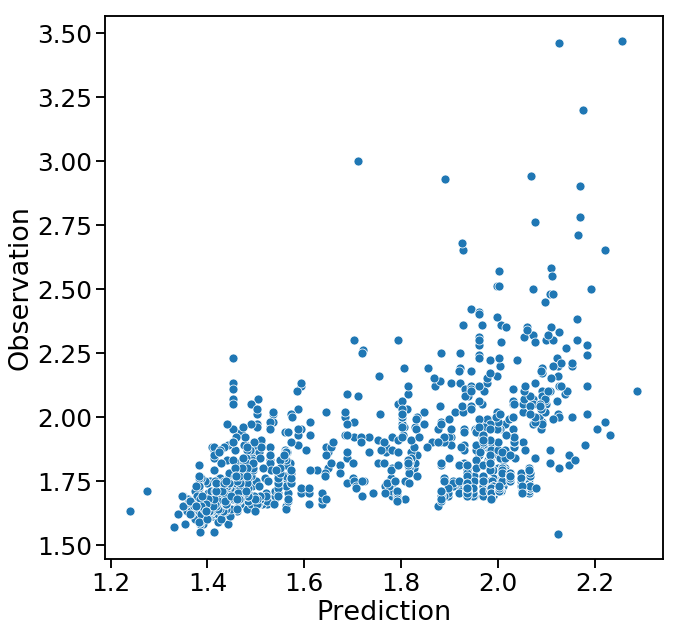

In [9]:
data = pd.DataFrame({'Prediction': y_pred, 'Observation': pg['Refractive Index'].values})

sb.set_context('talk', font_scale=1.5)
plt.figure(figsize=(10, 10))
ax = sb.scatterplot(x="Prediction", y="Observation", data=data)

#### 5. frozen feature extraction

In [10]:
# --- import necessary libraries

from xenonpy.descriptor import FrozenFeaturizer

# --- init FrozenFeaturizer with NN model
ff = FrozenFeaturizer(model=check.trained_model)

``FrozenFeaturizer`` accept a [Pytorch](https://pytorch.org) model as its input.

In [11]:
ff

FrozenFeaturizer(cuda=False, depth=None,
         model=Sequential(
  (0): Layer1d(
    (layer): Linear(in_features=290, out_features=284, bias=True)
    (batch_nor): BatchNorm1d(284, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act_func): ReLU()
    (dropout): Dropout(p=0.1)
  )
  (1): Layer1d(
    (layer): Linear(in_featur...pout(p=0.1)
  )
  (6): Layer1d(
    (layer): Linear(in_features=29, out_features=1, bias=True)
  )
),
         on_errors='raise', return_type='any')

The following code will generate new descriptors

In [12]:
neural_descriptors = ff.transform(pg_desc_, depth=1 ,return_type='df')

Here, ``depth=1`` means only the last hidden layer will be used as descriptor calculator.

In [13]:
neural_descriptors.head(3)

,L(-1)_1,L(-1)_2,L(-1)_3,L(-1)_4,L(-1)_5,L(-1)_6,L(-1)_7,L(-1)_8,L(-1)_9,L(-1)_10,...,L(-1)_20,L(-1)_21,L(-1)_22,L(-1)_23,L(-1)_24,L(-1)_25,L(-1)_26,L(-1)_27,L(-1)_28,L(-1)_29
0,-4.358868,-6.974391,-33.015968,-12.674155,-8.190677,-3.594921,-1.263103,-7.303878,-5.152706,-27.046162,...,-19.296021,-18.093885,-8.466791,8.603768,6.745081,-31.597719,-7.864301,-1.950370,-17.152351,-21.272667
1,-4.141970,-5.636797,-14.861248,-2.412704,-6.167406,0.345730,-4.211037,0.877367,-0.461650,-15.332149,...,-13.261558,-10.088490,-0.523882,4.155551,-1.086978,-16.278730,-4.987308,2.419169,-11.971654,-5.909220
2,-4.495153,-6.194894,-27.848259,-10.859283,-7.357226,-3.118665,-1.711845,-6.247580,-4.412067,-23.029686,...,-17.039110,-16.087767,-7.163743,7.821991,4.717700,-26.964067,-7.532869,-1.489739,-15.277795,-16.544161


**-1** in the column names denote the last layer.

#### 6. use neural descriptors to train new models.

In this case **Random Forest** model and **Bayesian Ridge Linear** model will be trained.

In [15]:
# split data
from xenonpy.datatools import Splitter

y = pg['Refractive Index']
splitter = Splitter(len(y), test_size=0.2)

X_train, X_test, y_train, y_test = splitter.split(neural_descriptors, y.values.reshape(-1, 1))

In [16]:
# random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train.ravel())
y_pred = rf.predict(X_test)
y_fit_pred = rf.predict(X_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Missing directory and/or file name information!


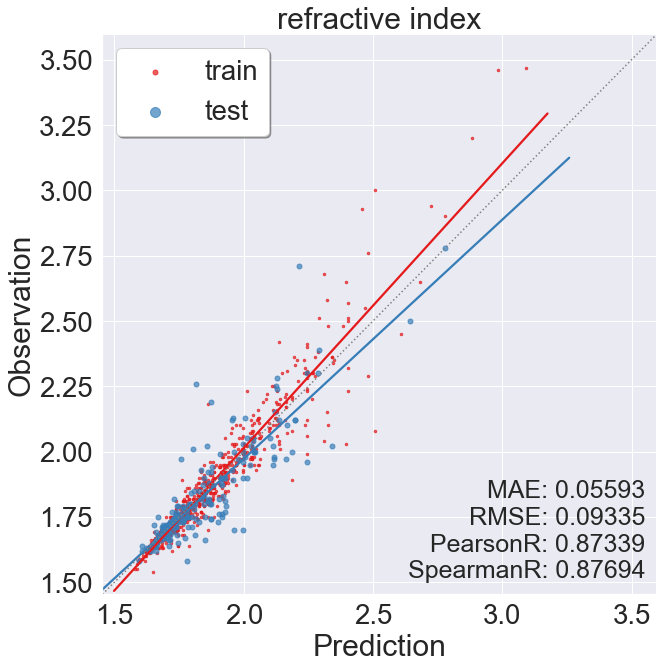

In [17]:
draw(y_test.ravel(), y_pred, y_train.ravel(), y_fit_pred, prop_name='refractive index')

In [18]:
# bayesian linear
from sklearn.linear_model import BayesianRidge

br = BayesianRidge()
br.fit(X_train, y_train.ravel())
y_pred = br.predict(X_test)
y_fit_pred = br.predict(X_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

Missing directory and/or file name information!


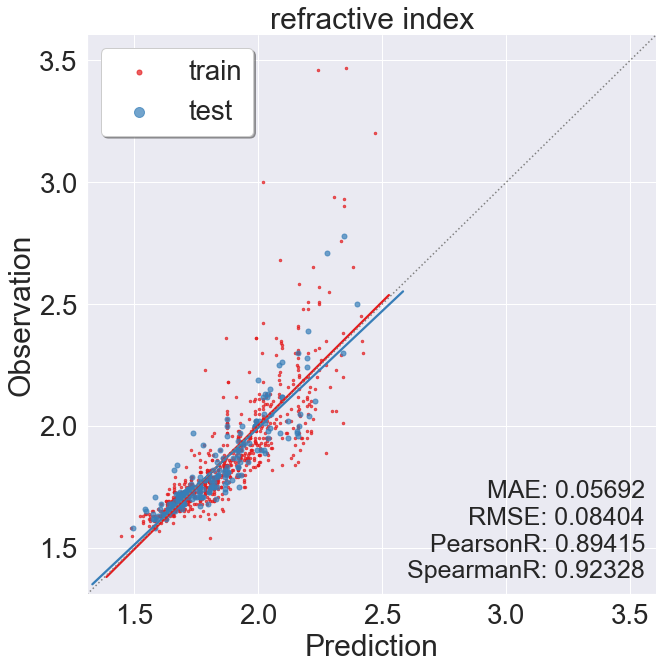

In [19]:
draw(y_test.ravel(), y_pred, y_train.ravel(), y_fit_pred, prop_name='refractive index')